In [17]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


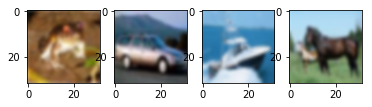

In [18]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

* 자료형 변환 및 스케일링

In [19]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [20]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

* 모형 구현

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu',padding = 'same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test), verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 1858s - loss: 2.6582 - acc: 0.1357 - val_loss: 2.3354 - val_acc: 0.1623
Epoch 2/50


In [ ]:
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.show()

In [ ]:
model.save("./model/cifar10_2.hdf5")